<p>
    <a href="https://umt.edu.al/en/anxhelo-shehu/" target="_blank">
    <img src="https://umt.edu.al/wp-content/uploads/2022/10/Anxhelo-Shehu-min-2-300x300.jpg" width="150" alt="UMT Logo">
    </a>
</p>
<p>
    <a href="https://umt.edu.al/" target="_blank">
    <img src="https://umt.edu.al/wp-content/uploads/2024/11/Universiteti-Metropolitan-Tirana.webp" width="200" alt="UMT Logo">
    </a>
</p>

<h1>Transformimi i Intensitetit dhe i Histogramse</h1>


Koha e nevojshme e percaktuar: **+50** minuta

<h2>Objectivat</h2>

Transformimet e pikselëve janë operacione që kryhen në piksel në një kohë. Në këtë laborator, do të filloni duke krijuar histograme. Histogramet shfaqin intensitetin e imazhit dhe mund të përdoren për të optimizuar karakteristikat e imazhit. Më pas, do të aplikoni Transformime të Intensitetit, duke bërë objektet më të lehta për t'u parë duke përmirësuar kontrastin dhe ndriçimin e imazhit. Në pjesën e fundit të laboratorit, do të përdorni përcaktimin e kufijve për të ndarë objektet nga imazhet.

<ul>
    <li><a href='#PT'>Transformimet e Pikselëve</a>
        <ul>
            <li>Histogramet</li>
            <li>Transformimet e Intensitetit</li>
            <li>Përcaktimi i Kufijve dhe Segmentimi i Thjeshtë</li>
        </ul>
    </li>
</ul>


Shkarkojme imazhet e nevojshme per kete **Lab** (lejohet edhe perdorimi i imazheve te tjera)

In [1]:
import requests

# URL-te per imazhet
urls = [
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png"
]

# Shkarkojme edhe ruajm imazhet duke perdorur URL-te perkatese
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        filename = url.split("/")[-1]
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"Shkarkuar: {filename}")
    else:
        print(f"Shkarkimi perfundoje: {url}")

Shkarkuar: lenna.png
Shkarkuar: baboon.png
Shkarkuar: goldhill.bmp
Shkarkuar: cameraman.jpeg
Shkarkuar: zelda.png
Shkarkuar: mammogram.png


 Per kete Lab do te perdorim keto funksione:

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Le të definojmë një funksion ndihmës për të vizualizuar dy imazhe paralelishte.

In [3]:
def plot_image(image_1, image_2,title_1="Im.Origjinal", title_2="Imazhi i Ri"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [79]:
def plot_hist(old_image, new_image,title_old="Im.Origjinal", title_new="Imazhi i Ri"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],color='green', width = 5)
    plt.title(title_old)
    plt.xlabel('Intensiteti')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],color='red', width = 5)
    plt.title(title_new)
    plt.xlabel('Intensiteti')
    plt.show()

# Histograma

Një histogramë numëron numrin e shfaqjeve të vlerave të intensitetit të pikselëve dhe është një mjet i dobishëm për të kuptuar dhe manipuluar imazhe. Ne përdorim <code>cv.calcHist()</code> për të gjeneruar histogramën. Ja vlerat e parametrave:
<p>
    <code>cv2.calcHist(CV array:<b>[image]</b> ky është kanali i imazhit:<b>[0]</b>, për këtë kurs do të jetë gjithmonë <b>[None]</b>, numri i bins:<b>[L]</b>, diapazoni i indeksit të bins:<b>[0,L-1]</b>) </code>   
</p>
Për imazhe reale, <code>L</code> është <code>256</code>.

## Shembull Ilustrues

Merrni parasysh nje `Imazh_shembull` me vlera intensiteti që variojnë nga 0 në 2.
Ne mund të krijojmë një histogramë. Elementi i parë është numri i zerove në imazh (në këtë rast, 1); elementi i dytë është numri i njësheve në imazh (në këtë rast, 5), dhe kështu me radhë.

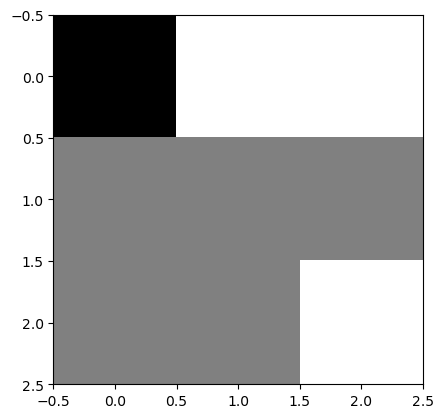

Imazh_shembull: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [5]:
shembull_imazh = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(shembull_imazh, cmap="gray")
plt.show()
print("Imazh_shembull:",shembull_imazh)

Ne mund të përdorim funksionin <code>calcHist</code>, në këtë rast, përdorim vetëm tre bins pasi ka vetëm tre vlera, dhe indeksi i bins është nga 1 deri në 3.


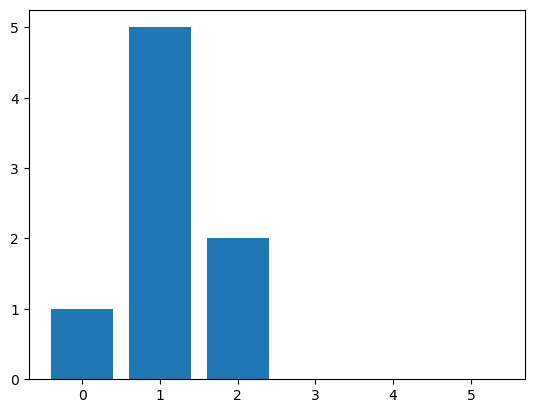

In [6]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

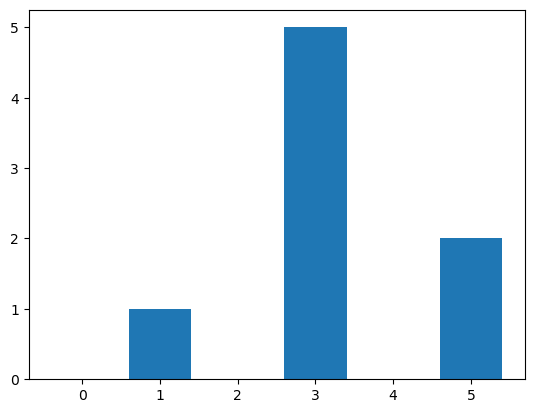

In [7]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()


Histogrami është një funksion ku $h[r]$ ku $r \in {0,1,2}$. Në shembullin e mësipërm, $h[0]=1$, $h[1]=5$ dhe $h[2]=3$.

## Histograma per imazhet ne Shkallen Gri(imazhet -- Bardhe e Zi)




Histogramet përdoren në imazhe në shkallë gri. Imazhet në shkallë gri përdoren në shumë aplikime, përfshirë ato mjekësore dhe industriale. Imazhet me ngjyra ndahen në luminancë dhe krominancë.

`Luminanca dhe krominanca janë koncepte të rëndësishme në procesimin e imazheve me ngjyra. Luminanca përbën pjesën e imazhit që paraqet intensitetin e dritës ose ndriçimit në shkallë gri, ndërsa krominanca përfaqëson ngjyrën dhe saturimin e ngjyrave në imazh.`

Luminanca është pjesa në shkallë gri dhe zakonisht përpunohen në shumë aplikime. Merrni parasysh imazhin e mëposhtëm "Gold Hill":

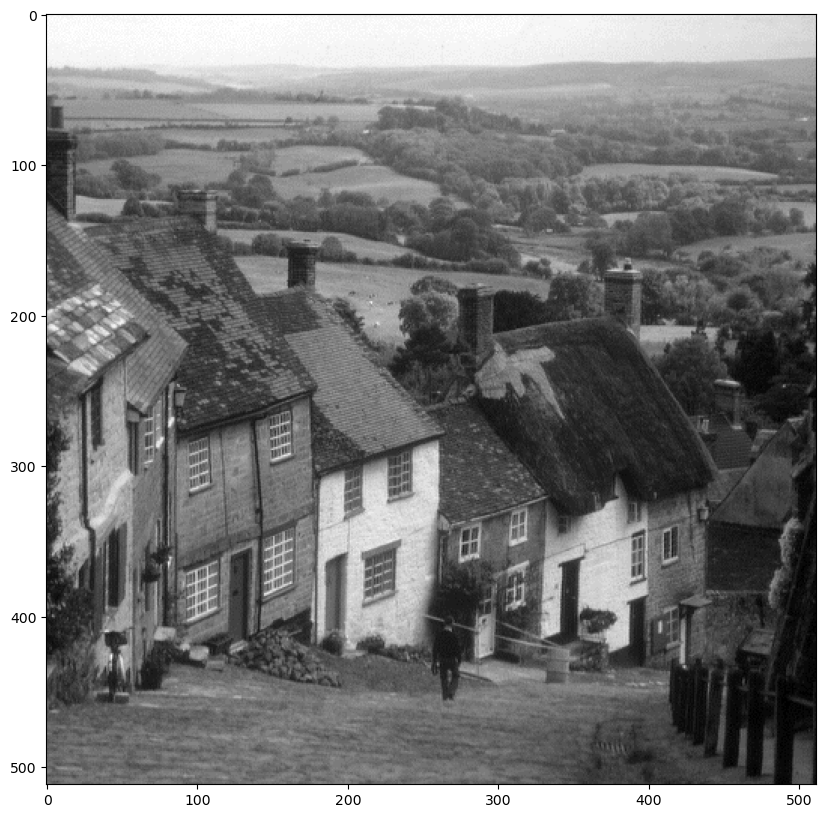

In [8]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [9]:
goldhill.shape

(512, 512)


Ne mund të kalkulojmë histogramën duke përdorur funksionin `calcHist` nga moduli `cv2` si më poshtë, forma është 256.

In [11]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,255])

In [17]:
print(hist.shape)
print(hist[44])


(256, 1)
[8990.]



Ne mund ta vizualizojmë atë si një grafik shtyllash, ku aksi $x$ përfaqëson intensitetet e pikselëve dhe aksi $y$ është numri i herëve që ka ndodhur vlera përkatëse e intensitetit të pikselëve në aksin $x$.

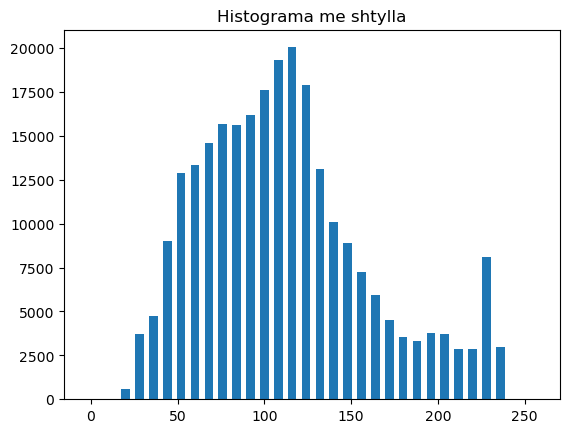

In [18]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,255])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)

plt.title("Histograma me shtylla")
plt.show()

Histograma është një funksion $h[r]$  ku   $r \in {0,1,..,255} $.


Mund ta konvertojmë në një funksion të masës së probabilitetit duke e normalizuar me numrin e pikselëve:  

$$
p[r] = \frac{h[r]}{NxM}
$$

ku $ N $ dhe $ M $ është dimensioni i imazhit, prodhimi i tyre jep numrin total te pikselëve në imazh.

In [19]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])
PMF

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00215149],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01409912],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01804352],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03429413],
       [0.        ],
       [0.        ],
       [0.   

Ne mund ta vizatojmë ate si një funksion të vazhdueshëm.

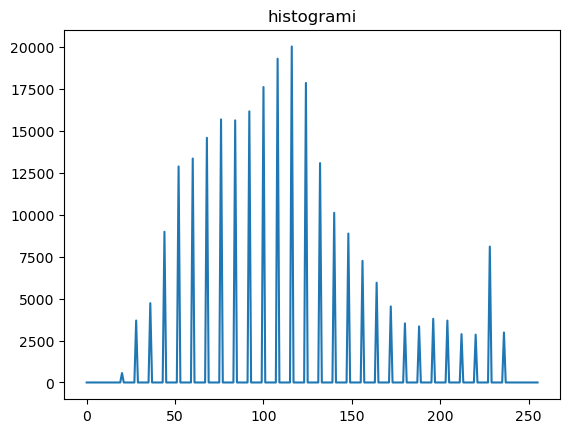

In [20]:
plt.plot(intensity_values,hist)
plt.title("histogrami")
plt.show()

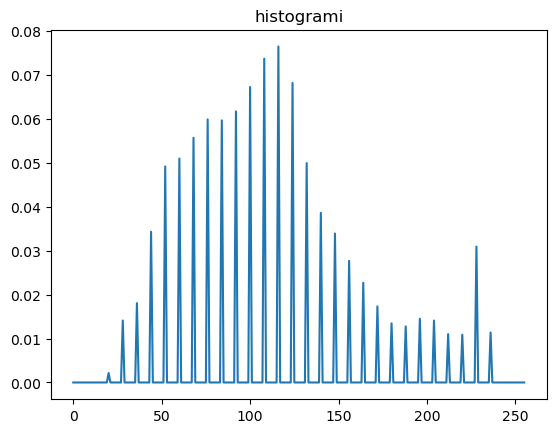

In [21]:
plt.plot(intensity_values,PMF)
plt.title("histogrami")
plt.show()

Ne gjithashtu mund të aplikojmë një histogram për secilin kanal të ngjyrave të imazhit.

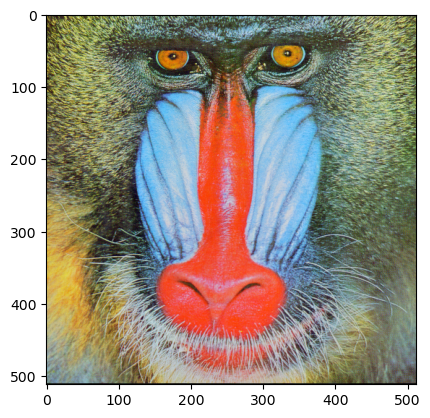

In [22]:
# per imazhin e baboon-it
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

Në cikël, vlera e <code>i</code> përcakton për cilin kanal të ngjyrave <code>calcHist</code> do të llogarisë histogramin.

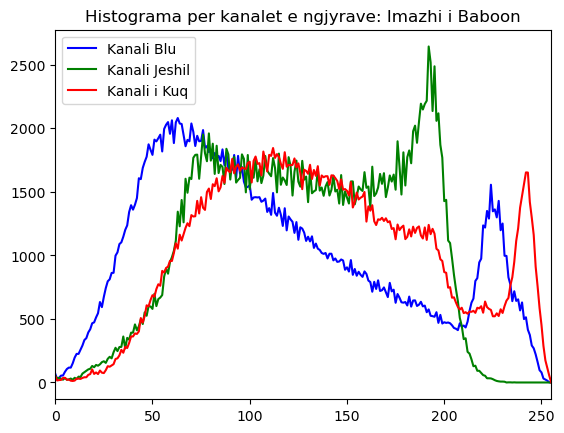

In [23]:
Ngjyrat = ('blue','green','red')
Ngjyr = ('Blu','Jeshil','i Kuq')
for i,ngj in enumerate(Ngjyrat):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,255])
    plt.plot(intensity_values, histr, color = ngj, label="Kanali "+Ngjyr[i])
    
    plt.xlim([0,255])
plt.legend()
plt.title("Histograma per kanalet e ngjyrave: Imazhi i Baboon")
plt.show()

#  Transformimi i Intensitetit


Është e dobishme ta imagjinojmë një imazh si një funksion  $f(x,y)$ në vend të një vargu në këtë pikë, ku `x` është indeksi i rreshtit dhe `y` është indeksi i kolonës. Mund të aplikoni një transformim $T$ mbi imazhin dhe të merrni një imazh të ri:

$$
g(x,y)=T(f(x,y))
$$

Një transformim i intensitetit varet vetëm nga një pikë e vetme $ (x,y) $. Për shembull, mund të aplikoni një transformim linear $ g(x,y) = 2f(x,y) + 1 $; kjo do të shumëzojë çdo piksel të imazhit me dy dhe do të shtojë njësi.

Pasi transformimet e intensitetit varen vetëm nga një vlerë, ato ndonjëherë quhen edhe **hartime të niveleve gri**. Nëse variabla $ r $ përfaqëson intensitetin e nivelit gri, i ngjashëm me vlerat e histogramit, atëherë dalja e re $ s $ jepet nga:

$$
s=T(r)
$$

### Imazhi Negativ(Negativi i Imazhit Origjinal)

Merrni parasysh një imazh me vlera intensiteti $L$ që variojnë nga $[0,L-1]$. Ne mund ta përmbysim nivelin e intensitetit duke aplikuar formulën e mëposhtme:
$$
g(x,y)=L-1-f(x,y)
$$

Duke përdorur shënimin e funksionit të transformimit të intensitetit
$$
s = L - 1 - r
$$

Kjo quhet negativi i imazhit. Për $L= 256$, formulat thjeshtohen në:
$$
g(x,y)=255-f(x,y) \qquad \mbox{dhe} \qquad s=255-r
$$

Ne mund të kryejmë transformim të intensitetit në imazhin shembull ku $L = 3$:

In [24]:
L = 3
neg_shembull_imazh = L - 1- shembull_imazh

print("Imazhi Shembull \n", shembull_imazh)
print("Imazhi Negativ i tij \n", neg_shembull_imazh)

Imazhi Shembull 
 [[0 2 2]
 [1 1 1]
 [1 1 2]]
Imazhi Negativ i tij 
 [[2 0 0]
 [1 1 1]
 [1 1 0]]



Shohim që intensitetet më të errëta bëhen më të ndritshme dhe ato më të ndritshme bëhen më të errëta, ndërsa intensitetet e mesme mbeten të njëjta.

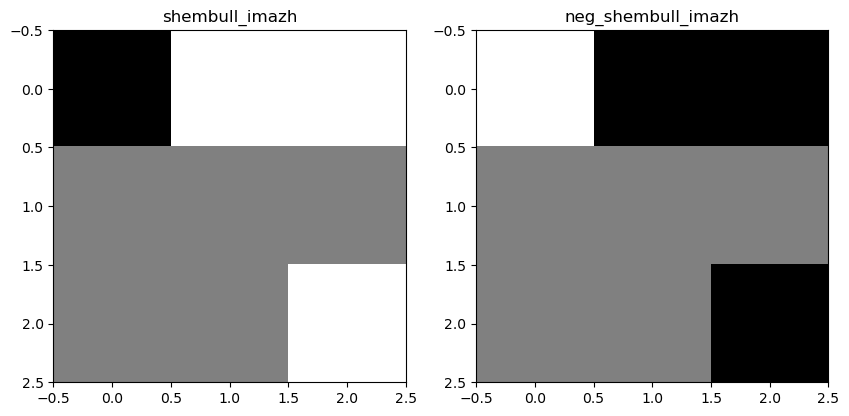

In [25]:
plot_image(shembull_imazh, neg_shembull_imazh, title_1="shembull_imazh", title_2="neg_shembull_imazh")

Përmbysja e intensitetit të imazhit ka shumë aplikime, duke përfshirë thjeshtimin e analizës së imazheve mjekësore. Merrni parasysh mamografinë me mikro-kalcifikime në kuadrantin e sipërm:

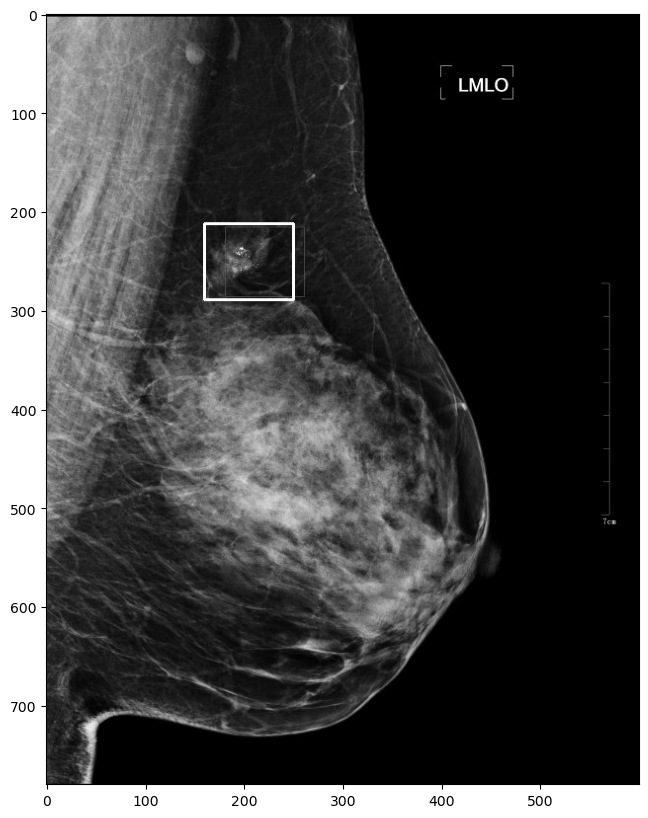

In [26]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
mammo = image
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

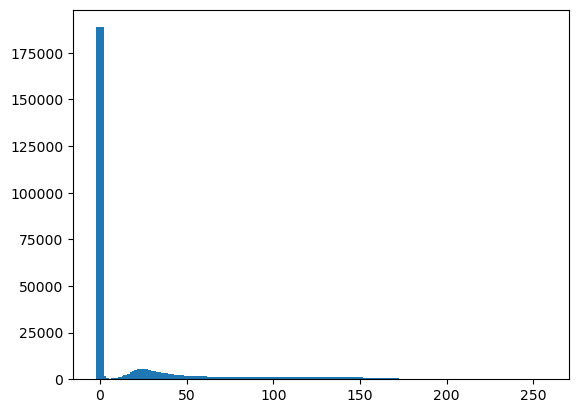

In [27]:
hist = cv2.calcHist([mammo],[0], None, [256], [0,255])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)

plt.show()


Ne mund te aplikojme transformimin e intensitetit

In [28]:
L = 256 
img_neg = L - 1 - image

In [29]:
img_neg

array([[253, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [169, 176, 179, ..., 255, 255, 255],
       ...,
       [210, 207, 204, ..., 255, 255, 255],
       [217, 212, 207, ..., 255, 255, 255],
       [224, 223, 216, ..., 255, 255, 255]], dtype=uint8)

Ne shohim se mikro-kalçifikimet në imazhin negativ janë më të lehta për t'u analizuar:

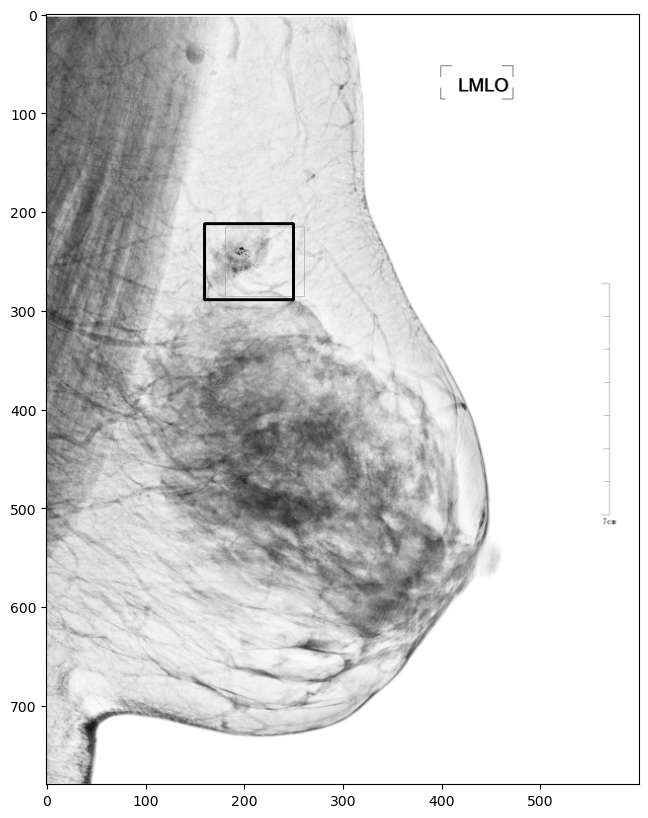

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

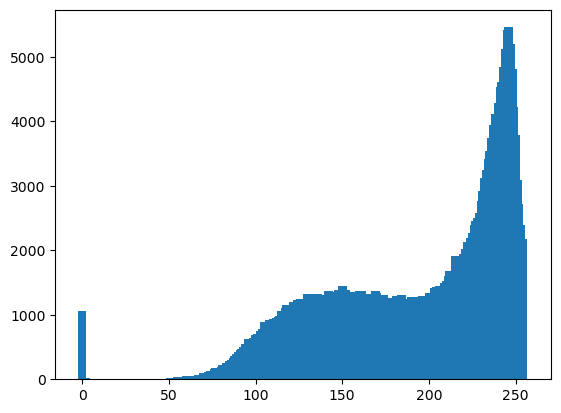

In [32]:
hist = cv2.calcHist([img_neg],[0], None, [256], [0,240])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)

plt.show()

## Rregullimi i ndriçimit dhe kontrastit

Ne mund të përdorim shumëzimin me $\alpha$ për kontrollin e kontrastit dhe shtimin me $\beta$ për përmirësimin e kontrollit të ndriçimit. Kjo aplikohet gjithashtu si një transformim i intensitetit. Imazhi është $f(x,y)$ dhe imazhi i transformuar është $g(x,y)$, ku $g(x,y) = \alpha f(x,y) + \beta$.

Në vend që ta implementojmë përmes operacioneve të array-ve, ne përdorim funksionin <code>convertScaleAbs</code>. Ky funksion shkallëzon, kalkulon vlerat absolute dhe konverton rezultatin në 8-bitë, kështu që vlerat bien midis $[0,255]$. Për kontrollin e ndriçimit, mund të vendosim $\alpha$ në 1 dhe $\beta$ në 100: Kujtoni imazhin e Good Hill, ai është i errët dhe i mjegullt, pra le të shohim nëse mund ta përmirësojmë.

In [38]:
alpha = 1 # Simple -> kontrrolli i kontrrastit
beta = -100   # Simple -> kontrrolli i ndricimit 
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

Ne mund ta vizualizojmë imazhin e ndriçuar, ai është shumë më i ndriçuar:

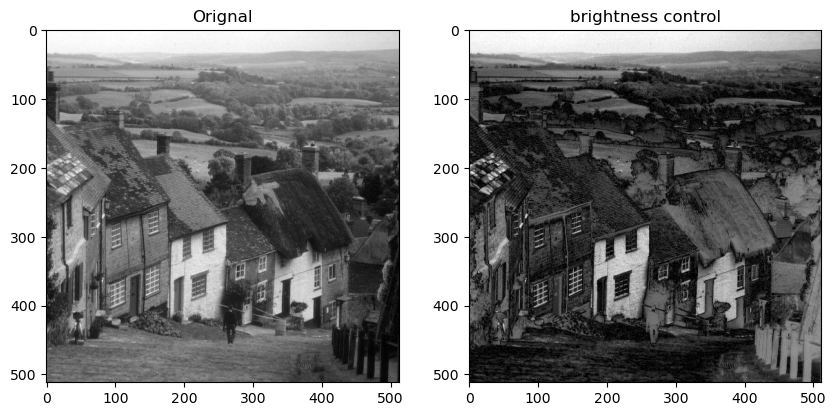

In [39]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")

Ne shohim që histogrami i imazhit të ndriçuar është i zhvendosur:

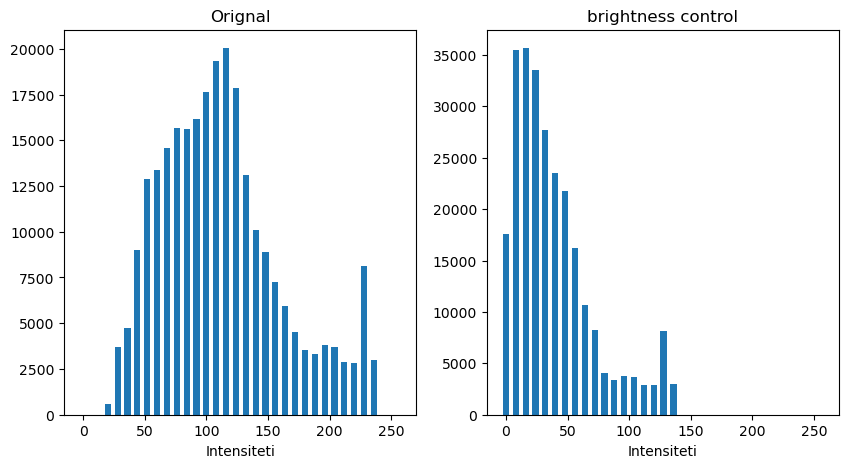

In [40]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

Ne mund të rrisim kontrastin duke rritur vlerën e $\alpha$:

In [41]:
plt.figure(figsize=(10,5))
alpha = 2# kontrrolli i kontrastit 
beta = 0 # kontrrolli i ndrricimit
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

Ne mund ta vizualizojmë imazhin dhe histogramin përkatës:

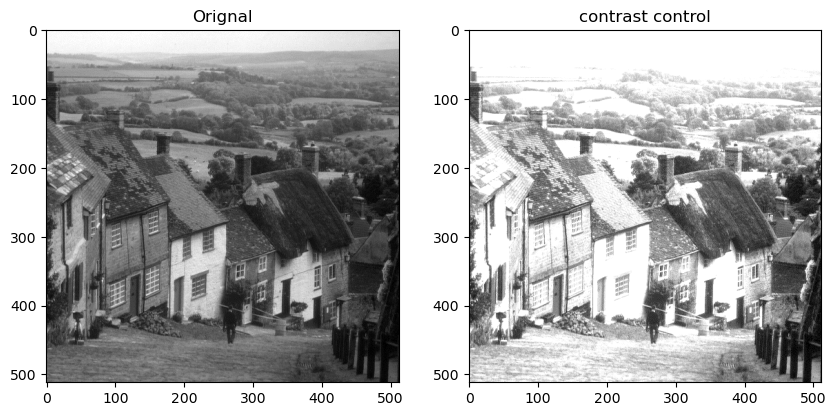

In [42]:
plot_image(goldhill,new_image,"Orignal","contrast control")

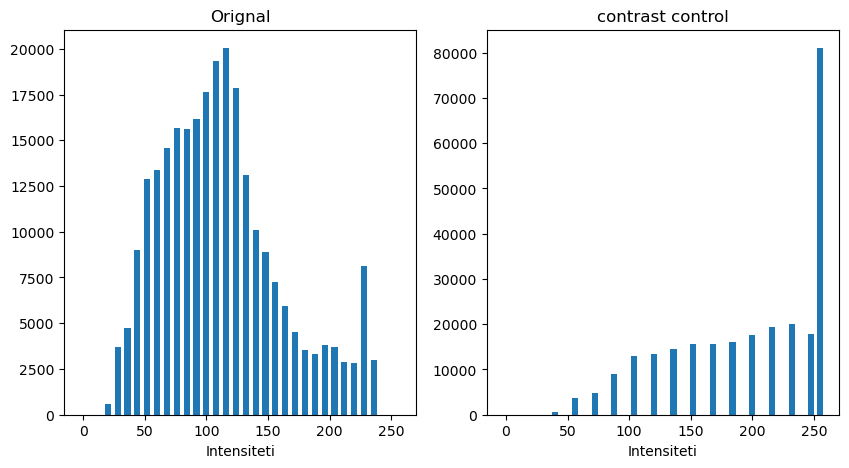

In [43]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

Kur vizualizojmë imazhin, shohim që është shumë i ndriçuar. Ne mund ta përshtatim ndriçimin duke e bërë imazhin më të errët dhe duke rritur kontrastin në të njëjtën kohë.

In [44]:
plt.figure(figsize=(10,5))
alpha = 3 
beta = -200     
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

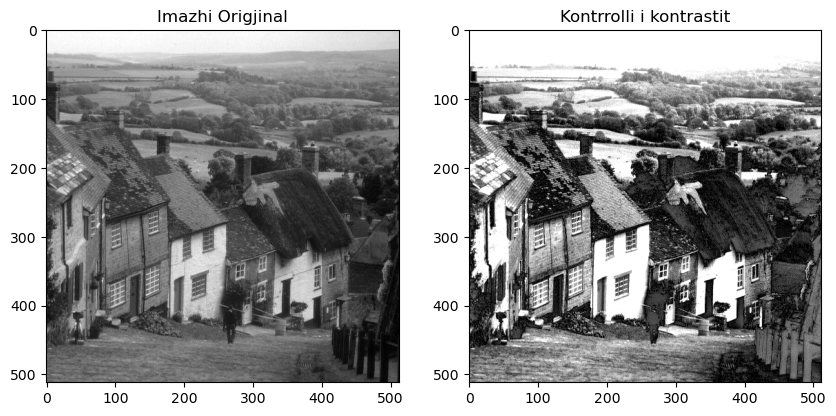

In [45]:
plot_image(goldhill,new_image,"Imazhi Origjinal","Kontrrolli i kontrastit")

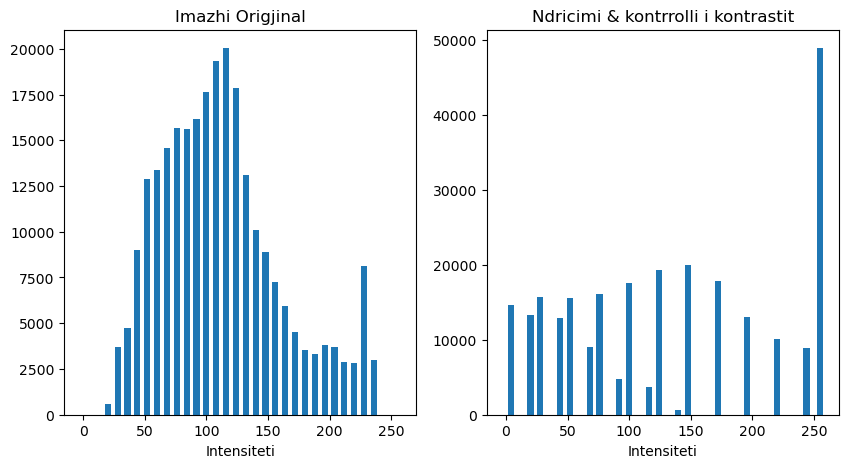

In [46]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Imazhi Origjinal", "Ndricimi & kontrrolli i kontrastit")

Ka metoda të tjera jo-lineare për të përmirësuar kontrastin dhe ndriçimin, këto metoda kanë grupe të ndryshme parametrash. Në përgjithësi, është e vështirë të rregullohen manualisht parametrat e kontrastit dhe ndriçimit, por ka algoritme që përmirësojnë automatikisht kontrastin.

## Barazimi i histogrames


Ekspozita e Histogramës rrit kontrastin e imazheve, duke shtrirë gamën e pikselëve në shkallë gri; e bën këtë duke sheshuar histogramën. Ne thjesht aplikohet funksioni <code>cv2.equalizeHist</code>.

In [51]:
zelda = cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
new_image2 = cv2.equalizeHist(new_image)

Ne mund të krahasojmë imazhin para dhe pas Ekspozitës së Histogramës, dhe shohim që kontrasti është përmirësuar. Pas aplikimit të Ekspozitës së Histogramës, histogrami është shtrirë.

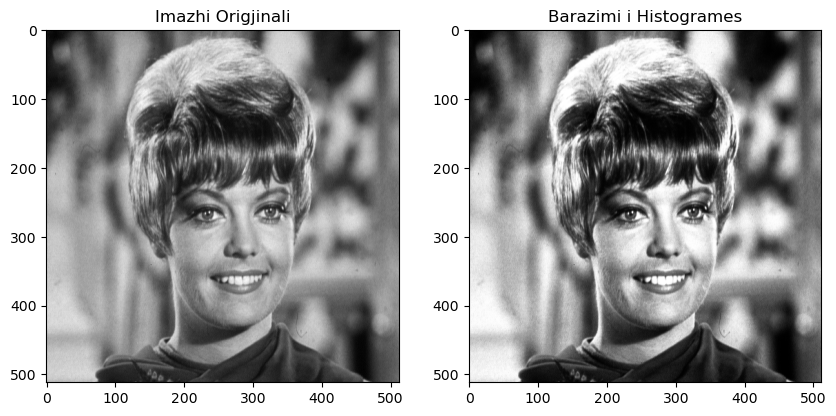

In [49]:
plot_image(zelda,new_image,"Imazhi Origjinali","Barazimi i Histogrames")

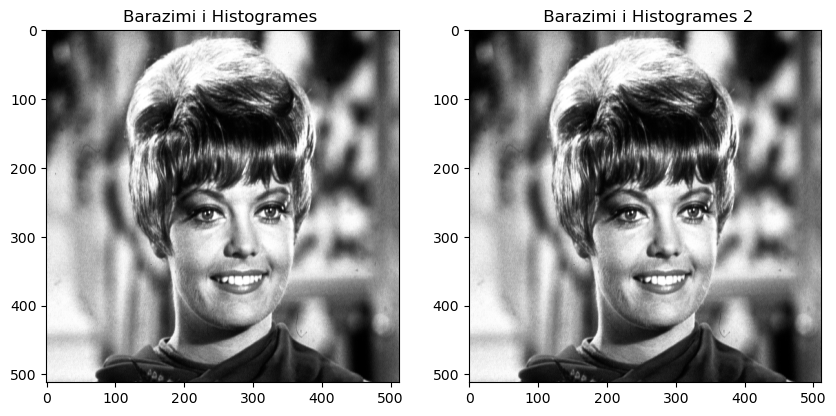

In [53]:
plot_image(new_image,new_image2,"Barazimi i Histogrames "," Barazimi i Histogrames 2")

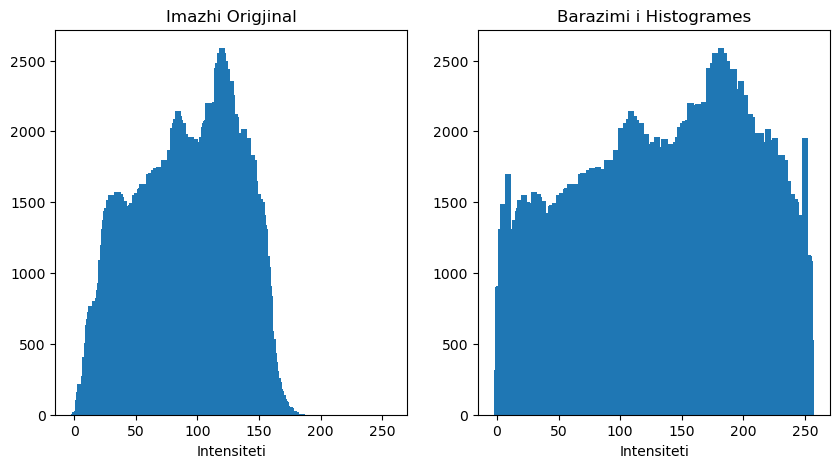

In [50]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Imazhi Origjinal","Barazimi i Histogrames")

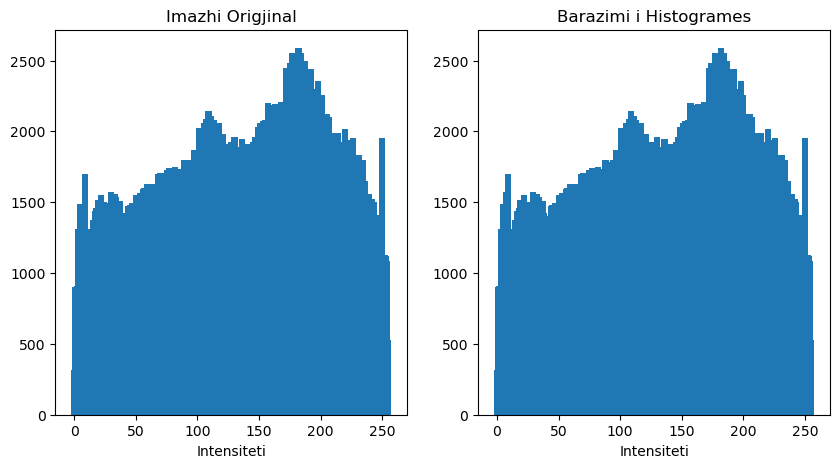

In [54]:
plt.figure(figsize=(10,5))
plot_hist(new_image, new_image2,"Imazhi Origjinal","Barazimi i Histogrames")

## Përcaktimi i Pragut dhe Segmentimi i Thjeshtë

Përcaktimi i Pragut përdoret në segmentimin e imazheve, që do të thotë nxjerrja e objekteve nga një imazh. Segmentimi i imazheve përdoret në shumë aplikime, përfshirë nxjerrjen e tekstit, imazherinë mjekësore dhe imazherinë industriale.  
Përcaktimi i pragut në një imazh merrfunksionon keshtu, merr një prag; nëse një piksel i caktuar `(i,j)` është më i madh se ai prag, atëherë ai piksel do të vendoset në një vlerë, zakonisht `1 ose 255`, përndryshe do të vendoset në një vlerë tjetër, zakonisht `0`. Ne mund të shkruajmë një funksion Python që do të kryejë përcaktimin e pragut(klasifikimit te pikselave ne baze te vlerave) dhe do të nxjerrë një imazh të ri duke marrë si hyrje një imazh në shkallë gri:

In [84]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
    
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             


Konsiderojme imazhin e meposhtem(imazhin Shembull)

In [56]:
shembull_imazh

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

Ne mund të aplikojmë përcaktimin e pragut per pikselat, duke vendosur të gjitha vlerat më të vogla se dy në zero.

In [57]:
threshold = 1
max_value = 2
min_value = 0
thresholding_image = thresholding(shembull_imazh, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_image

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

Ne mund të krahasojmë dy imazhet. Në imazhin e ri, shohim që të gjitha vlerat gri tani janë të zeza:

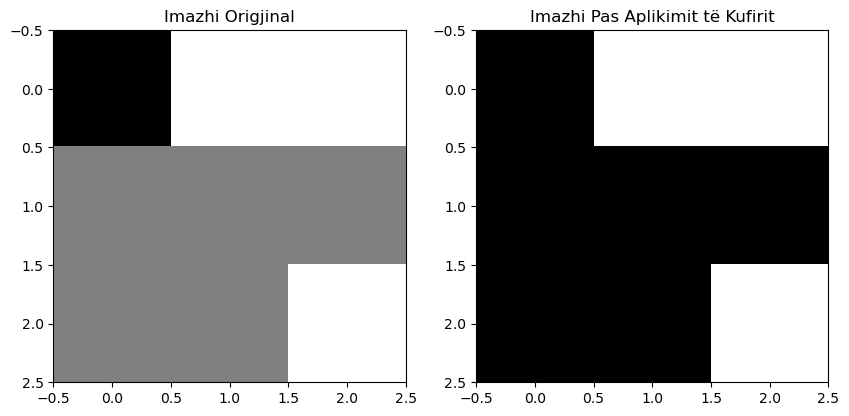

In [58]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(shembull_imazh, cmap="gray")
plt.title("Imazhi Origjinal")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_image, cmap="gray")
plt.title("Imazhi Pas Aplikimit të Kufirit")
plt.show()

aplikojme trsholding mbi imazhin e kameramanit:

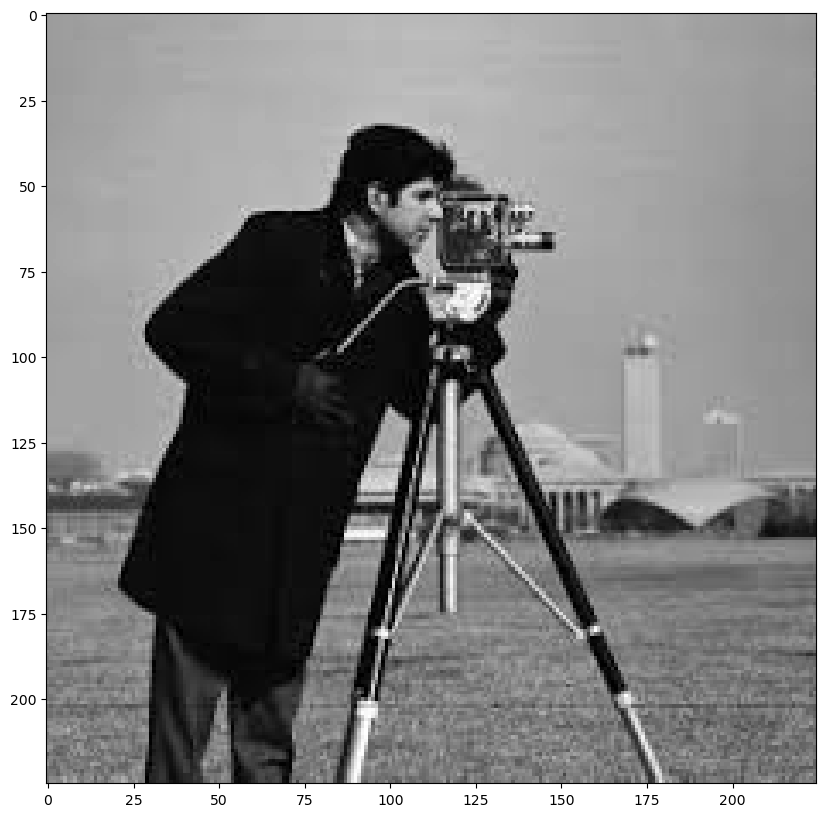

In [59]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

Ne mund të shohim nga histogrami dy maja(ekstrremume), kjo do të thotë se ka një përqindje të madhe të pikselëve në ato dy intensitete:

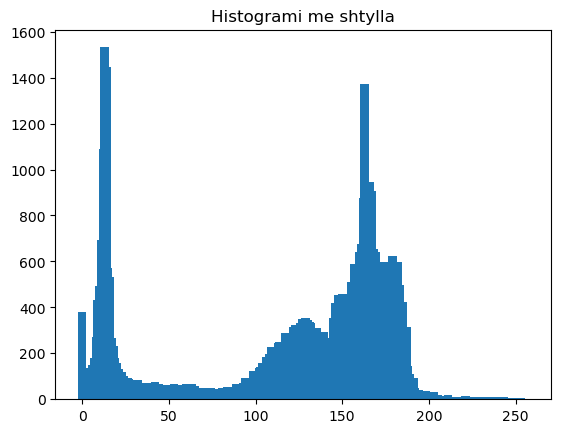

In [60]:
hist = cv2.calcHist([image], [0], None, [256], [0, 255])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Histogrami me shtylla")
plt.show()


Kameramani i përket pikselëve më të errët, prandaj mund të vendosim pragun në një mënyrë që të segmentohet kameramani. Në këtë rast, duket se është pak më i vogël se 90, le të provojmë:


In [69]:
threshold = 90
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

Ne shohim që pikselët që i përkasin kameramanit tani janë zero, ndërsa të tjerët janë vendosur në 255:


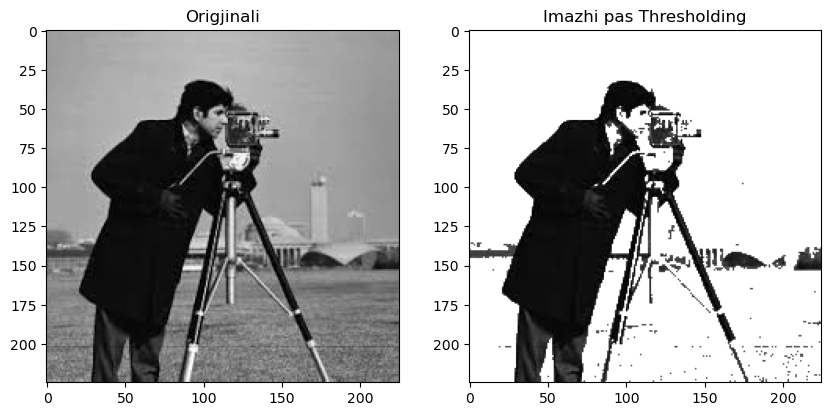

In [70]:
plot_image(image, new_image, "Origjinali", "Imazhi pas Thresholding")

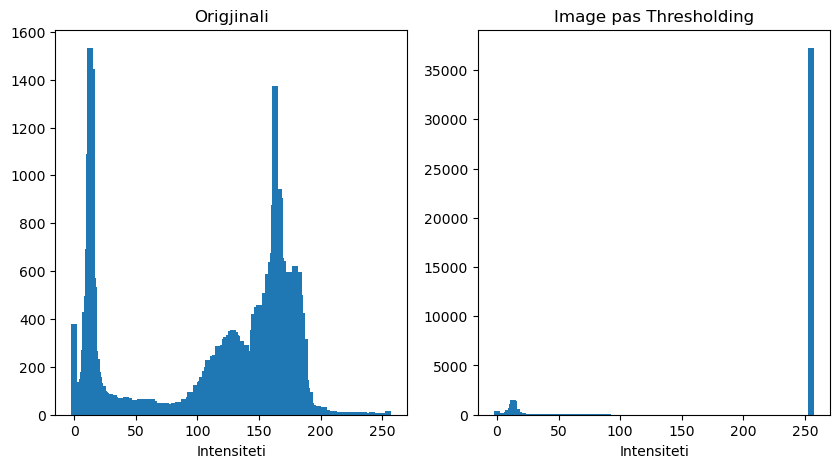

In [71]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Origjinali", "Image pas Thresholding")

Funksioni <code>cv.threshold</code> aplikon një prag në imazhin në shkallë gri, me parametrat e mëposhtëm:

<code>cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )</code>


Parametri i llojit të përcaktimit të pragut është lloji i përcaktimit të pragut që do të duam të kryejmë. Për shembull, kemi përcaktimin bazik të pragut: <code>cv2.THRESH_BINARY</code>, ky është lloji që kemi implementuar në funksionin <code>thresholding</code>, është thjesht një numër:

In [72]:
cv2.THRESH_BINARY

0

Ne mund të aplikojmë përcaktimin e pragut në imazh si më poshtë:

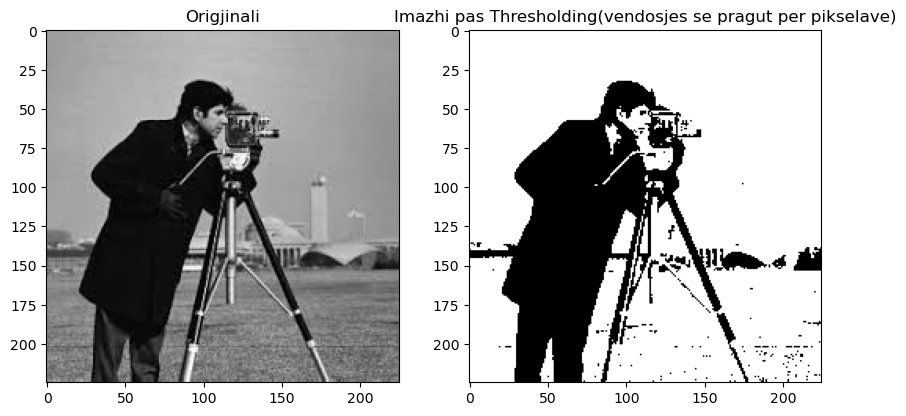

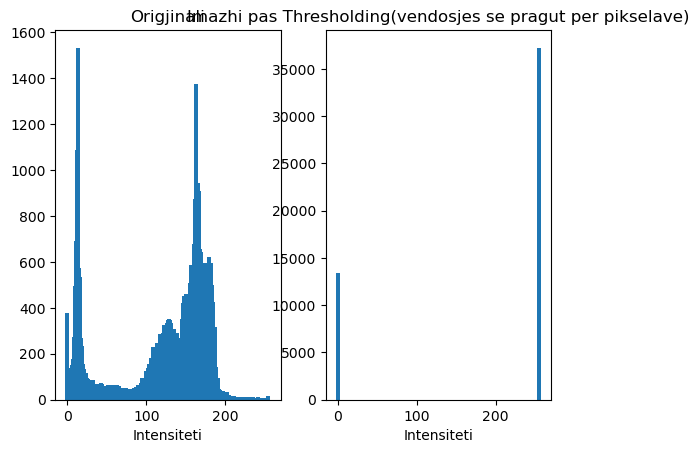

In [73]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Origjinali","Imazhi pas Thresholding(vendosjes se pragut per pikselave)")
plot_hist(image, new_image,"Origjinali","Imazhi pas Thresholding(vendosjes se pragut per pikselave)")

<code>ret</code> është vlera e pragut dhe <code>new_image</code> është imazhi pasi të jetë aplikuar përcaktimi i pragut. Ka lloje të ndryshme klasifikuesish, për shembull, <code>cv2.THRESH_TRUNC</code> nuk do të ndryshojë vlerat nëse pikselët janë më të vegjël se vlera e pragut:

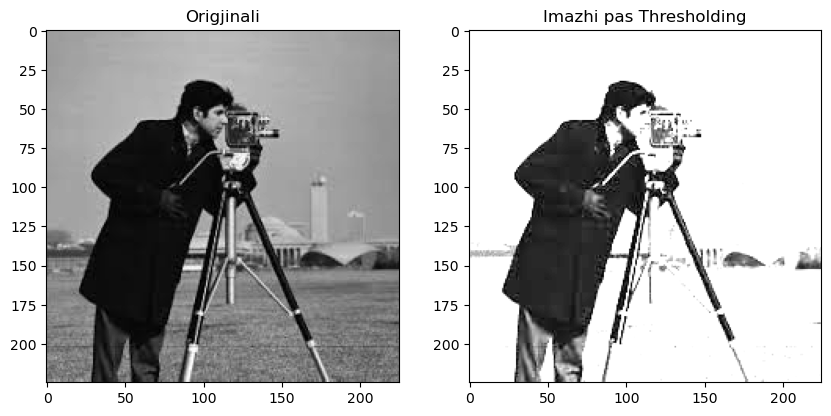

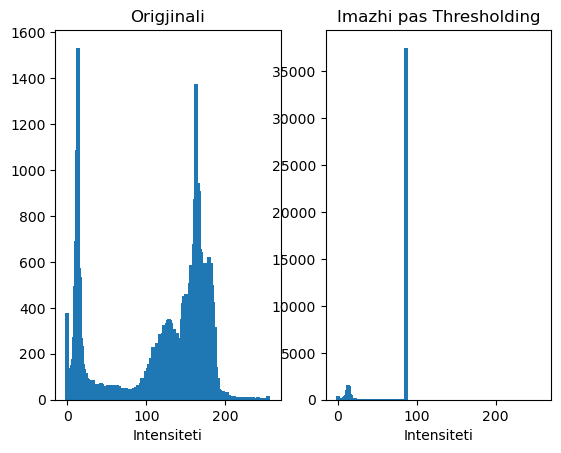

In [74]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Origjinali","Imazhi pas Thresholding")
plot_hist(image, new_image,"Origjinali","Imazhi pas Thresholding")

In [75]:
ret

86.0

Ne shohim që elementët më të errët nuk janë ndryshuar dhe vlerat më të ndritura janë vendosur në 255.

Metoda e Otsu <code>cv2.THRESH_OTSU</code> shmang nevojën për të zgjedhur një vlerë dhe e përcakton automatikisht atë, duke përdorur histogramën.

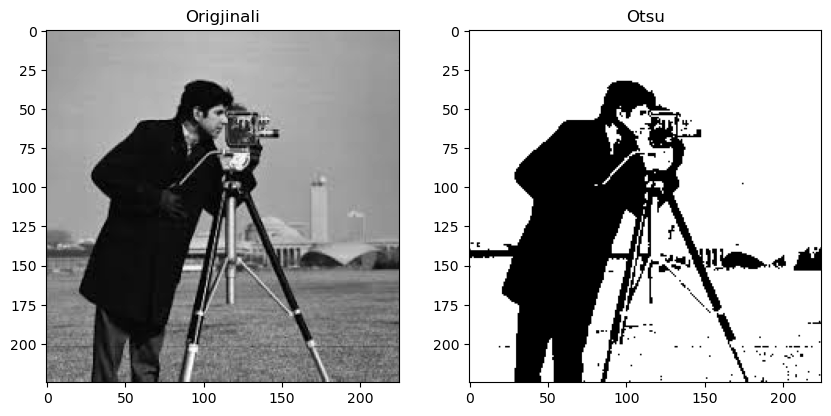

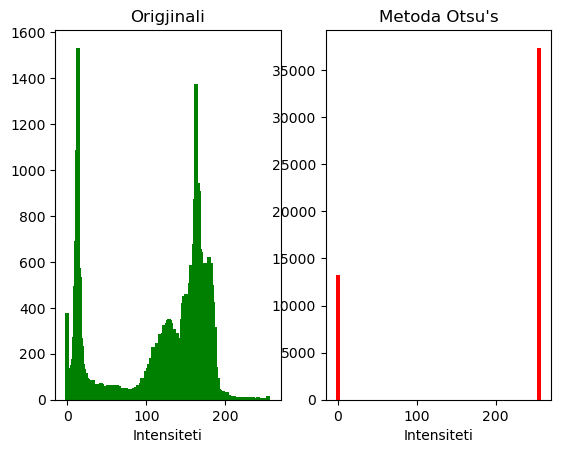

In [80]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Origjinali","Otsu")
plot_hist(image, otsu,"Origjinali","Metoda Otsu's")


Ne i caktojmë rreshtin e parë të pikselëve të array origjinal në rreshtin e fundit të array-it të ri. E përsërisim këtë proces për çdo rresht, duke rritur numrin e rreshtit për array origjinal dhe duke zvogëluar indeksin e rreshtit të array të ri, duke caktuar pikselët përkatës.

In [77]:
ret

88.0

Te njejten gje mund te bejm edhe per imazhet mjekesore

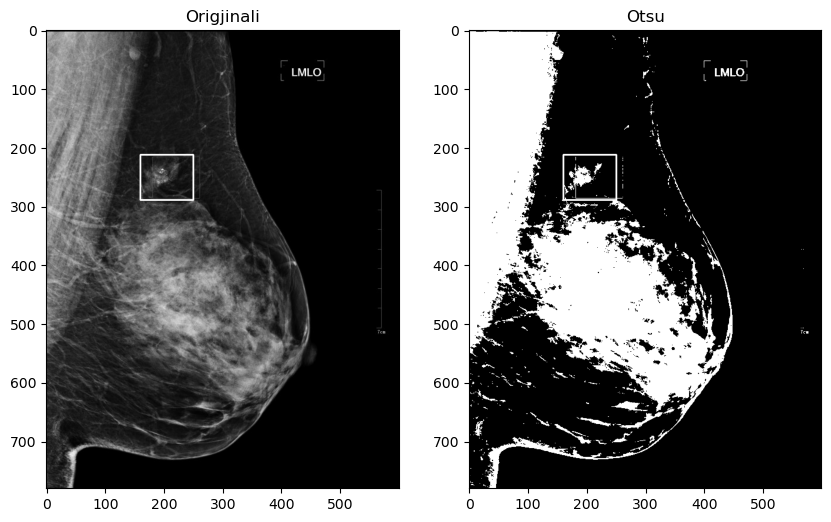

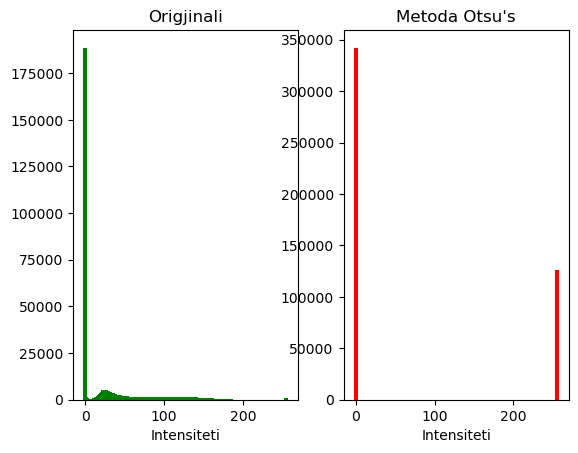

In [81]:
ret, otsu = cv2.threshold(mammo,0,255,cv2.THRESH_OTSU)
plot_image(mammo,otsu,"Origjinali","Otsu")
plot_hist(mammo, otsu,"Origjinali","Metoda Otsu's")

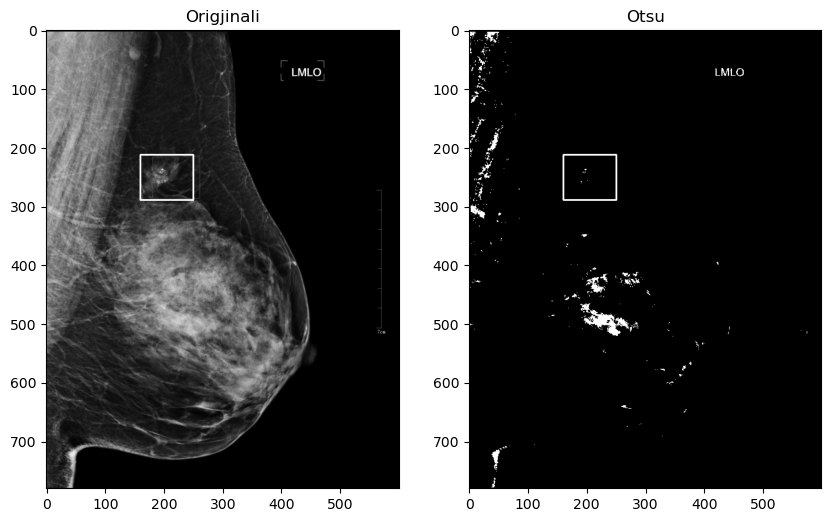

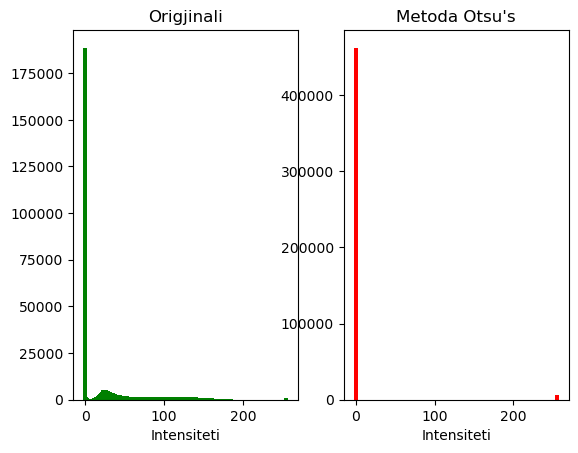

In [86]:
vs = thresholding(mammo,170,max_value=255, min_value=0)
plot_image(mammo,vs,"Origjinali","Otsu")
plot_hist(mammo, vs,"Origjinali","Metoda Otsu's")

# Referenca

[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<h3 align="center"> &#169; UMT. All rights reserved. <h3/>


## Ushtrim: 

**1)** Të shkarkohet një imazh (i ri i një kafshe të caktuar ose të përdoret imazhi i maces).  

**2)** Të llogaritet histogrami për imazhin me ngjyra.  

**3)** Të konvertohet në formatin bardh e zi dhe të llogaritet sërish histogrami.  

**4)** Të llogaritet probabiliteti për çdo intensitet.  

**5)** Të printohet imazhi negativ.  

**6)** Për imazhin pozitiv ose negativ, të vendoset një prag manualisht në bazë të histogramit dhe duke përdorur metodën e Otsu.  

Nje pjes e dokumentit eshte marre nga:
<p>
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>